In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kinematics-motion-data/Kinematics_Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/kinematics-motion-data/Kinematics_Data.csv')
df.shape

(88588, 11)

In [3]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [6]:
df.isna().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [7]:
df['wrist'].unique()

array([0, 1])

In [8]:
df['username'].unique()

array(['viktor'], dtype=object)

In [9]:
df['date'].unique()

array(['2017-6-30', '2017-7-10', '2017-7-11', '2017-7-15', '2017-7-16',
       '2017-7-17', '2017-7-1', '2017-7-2', '2017-7-4', '2017-7-6',
       '2017-7-7', '2017-7-9'], dtype=object)

In [10]:
# Date, Time and Username are not going to be universal features so we can drop them first

df = df.drop(columns=['username','date','time'],axis=1)
df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


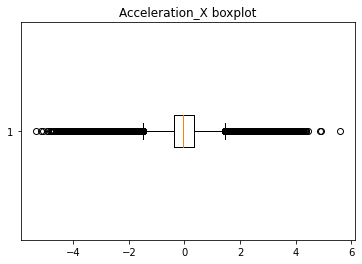

In [11]:
from matplotlib import pyplot as plt

plt.boxplot(df['acceleration_x'],vert=False)
plt.title('Acceleration_X boxplot')
plt.show()

In [12]:
from scipy import stats

def zscore(col):
    thres = 3
    t = []
    for i in stats.zscore(df[col]):
        if(i < 3):
            t.append(i)
        else:
            t.append('nan')
    return t

In [13]:
acc_x = zscore('acceleration_x')
acc_y = zscore('acceleration_y')
acc_z = zscore('acceleration_z')
gyro_x = zscore('gyro_x')
gyro_y = zscore('gyro_y')
gyro_z = zscore('gyro_z')

In [14]:
print(len(acc_x))
print(len(acc_y))
print(len(acc_z))
print(len(gyro_x))
print(len(gyro_y))
print(len(gyro_z))

88588
88588
88588
88588
88588
88588


#### The features doesn't seem to have outliers and we used zscore rather than quarantiles as these are continuous observational facts and dispersed all over.

In [15]:
df_else = df.sample(frac=0.9,random_state=20)
df_test = df.drop(df_else.index)

df_else = df_else.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_else.shape

(79729, 8)

In [16]:
df_test.shape

(8859, 8)

In [17]:
# Feature Selection
# Numerical input Categorical output

df_cat = df_else[['wrist','activity']]
df_num = df_else.drop(columns=['wrist'],axis=1)

from sklearn.feature_selection import f_classif

f_score = []
p_value = []
for i in df_num.columns:
    f_score.append(f_classif(df_num[[i]],df_num['activity'])[0][0])
    p_value.append(f_classif(df_num[[i]],df_num['activity'])[1][0])
    
f_sco = pd.DataFrame(columns=['col','f_score','p_value'])

f_sco['col'] = df_num.columns
f_sco['f_score'] = f_score
f_sco['p_value'] = p_value

f_sco

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


,col,f_score,p_value
0,activity,inf,0.000000e+00
1,acceleration_x,2.546240e+01,4.520778e-07
2,acceleration_y,5.501001e+04,0.000000e+00
3,acceleration_z,3.093820e+03,0.000000e+00
4,gyro_x,1.468447e+02,9.086806e-34
5,gyro_y,1.382455e+01,2.008341e-04
6,gyro_z,3.809634e+00,5.096208e-02


In [18]:
p_sig = []
for i in range(len(f_sco)):
    if(f_sco['p_value'][i] <= 0.05):
        p_sig.append('Significant')
    else:
        p_sig.append('Not Significant')
        
f_sco['p_sig'] = p_sig
f_sco

,col,f_score,p_value,p_sig
0,activity,inf,0.000000e+00,Significant
1,acceleration_x,2.546240e+01,4.520778e-07,Significant
2,acceleration_y,5.501001e+04,0.000000e+00,Significant
3,acceleration_z,3.093820e+03,0.000000e+00,Significant
4,gyro_x,1.468447e+02,9.086806e-34,Significant
5,gyro_y,1.382455e+01,2.008341e-04,Significant
6,gyro_z,3.809634e+00,5.096208e-02,Not Significant


In [19]:
f_sco = f_sco.sort_values(by=['f_score'],ascending=False)
f_sco = f_sco.reset_index(drop=True)
f_sco

,col,f_score,p_value,p_sig
0,activity,inf,0.000000e+00,Significant
1,acceleration_y,5.501001e+04,0.000000e+00,Significant
2,acceleration_z,3.093820e+03,0.000000e+00,Significant
3,gyro_x,1.468447e+02,9.086806e-34,Significant
4,acceleration_x,2.546240e+01,4.520778e-07,Significant
5,gyro_y,1.382455e+01,2.008341e-04,Significant
6,gyro_z,3.809634e+00,5.096208e-02,Not Significant


Text(0, 0.5, 'f_score')

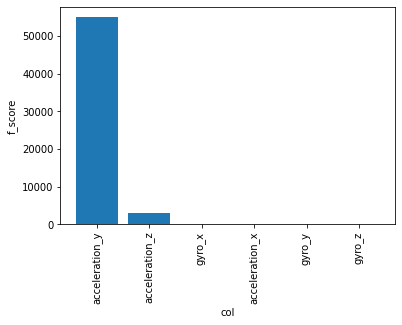

In [20]:
plt.bar(f_sco['col'],f_sco['f_score'])
plt.xticks(rotation=90)
plt.xlabel('col')
plt.ylabel('f_score')

In [21]:
f_sco1 = f_sco.iloc[2:,:]
f_sco1

,col,f_score,p_value,p_sig
2,acceleration_z,3093.820143,0.000000e+00,Significant
3,gyro_x,146.844687,9.086806e-34,Significant
4,acceleration_x,25.462401,4.520778e-07,Significant
5,gyro_y,13.824549,2.008341e-04,Significant
6,gyro_z,3.809634,5.096208e-02,Not Significant


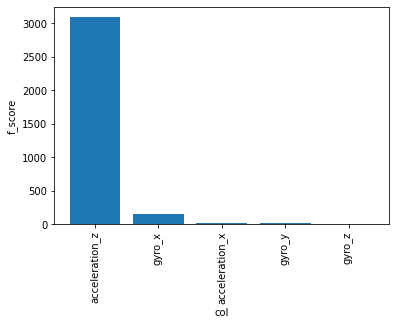

In [22]:
plt.bar(f_sco1['col'],f_sco1['f_score'])
plt.xlabel('col')
plt.ylabel('f_score')
plt.xticks(rotation=90)
plt.show()

#### From the above values it is avident that acceleration_y is the most dominant feature and acceleration_z to an extent so we are only considering jsut these two from numerical features.

In [23]:
df_cat

,wrist,activity
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
79724,1,1
79725,1,1
79726,0,0
79727,1,0


In [24]:
# Since both input and output are categorical, we use chi2

from sklearn.feature_selection import chi2

chi2 = chi2(df_cat[['wrist']],df_cat['activity'])

chi2

(array([495.67827018]), array([8.28513456e-110]))

In [25]:
if(chi2[1][0] <= 0.05):
    print('significant')
else:
    print('Not Significant')

significant


#### Since there are no other categorical features to compare with, we are going to use this feature in addition to other features.

In [26]:
f_sco = f_sco.drop(0)
f_sco = f_sco.loc[f_sco['f_score'] > 3000]

f_sco_sel = f_sco['col']

f_sco_sel = f_sco_sel.to_list()
f_sco_sel

['acceleration_y', 'acceleration_z']

In [27]:
f_sco_sel.append('wrist')
f_sco_sel.append('activity')

In [28]:
f_sco_sel

['acceleration_y', 'acceleration_z', 'wrist', 'activity']

In [29]:
df_else = df_else[f_sco_sel]
df_test = df_test[f_sco_sel]

df_else.head()

,acceleration_y,acceleration_z,wrist,activity
0,-0.8474,-0.3257,1,0
1,0.1967,-0.2684,0,1
2,0.5164,-0.4528,0,1
3,0.5867,0.0250,0,1
4,0.7209,-0.2858,0,1


In [30]:
df_test.head()

,acceleration_y,acceleration_z,wrist,activity
0,-0.7814,-0.0076,0,0
1,-1.1574,-0.0172,0,0
2,-0.7421,-0.0549,0,0
3,-0.7532,-0.2972,0,0
4,-0.8049,-0.1815,0,0


In [31]:
df_else['activity'].value_counts()

1    39891
0    39838
Name: activity, dtype: int64

#### Since the value counts show that is if almost perfectly balanced dataset, we need not use any balncing algorithms.

In [32]:
from numpy import mean
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

def rf(X,y):
    model = RandomForestClassifier(n_estimators=10)
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=25)
    scores = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
    m = mean(scores)
    return m

def brf(X,y):
    model = BalancedRandomForestClassifier(n_estimators=10)
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3, random_state=25)
    scores = cross_val_score(model,X,y,scoring='balanced_accuracy',cv=cv,n_jobs=-1)
    
    m = mean(scores)
    return m

def gnb(X,y):
    model = GaussianNB()
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=25)
    scores = cross_val_score(model,X,y,scoring='balanced_accuracy',cv=cv,n_jobs=-1)
    
    m = mean(scores)
    return m

def nei(X,y):
    model = KNeighborsClassifier()
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=25)
    scores = cross_val_score(model,X,y,scoring='balanced_accuracy',cv=cv,n_jobs=-1)
    
    m = mean(scores)
    return m

In [33]:
X = df_else.drop(columns=['activity'],axis=1)
y = df_else['activity']

In [34]:
print(rf(X,y))

0.9594200275194423


In [35]:
print(brf(X,y))

0.9597255500179863


In [36]:
print(gnb(X,y))

0.9566567412508534


In [37]:
print(nei(X,y))

0.960946101440363


In [38]:
from sklearn.model_selection import RandomizedSearchCV

model = KNeighborsClassifier()

params_grid = {
    'n_neighbors':[1,10,20],
    'p':[1,2]
}

rnd_search_cv = RandomizedSearchCV(model,params_grid,n_iter=10,cv=3,return_train_score=True)
rnd_search_cv.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 10, 20],
                                        'p': [1, 2]},
                   return_train_score=True)

In [39]:
rnd_search_cv.best_params_

{'p': 1, 'n_neighbors': 20}

In [40]:
final_model = rnd_search_cv.best_estimator_

In [41]:
df_test = df_test.reset_index(drop=True)

In [42]:
test_x = df_test.drop(columns=['activity'],axis=1)
test_y = df_test['activity']

pred = final_model.predict(test_x)

prediction = pd.DataFrame(columns=['true','pred'])

prediction['true'] = test_y
prediction['pred'] = pred

prediction.head()

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(prediction['true'],prediction['pred'])

0.9616209504458743

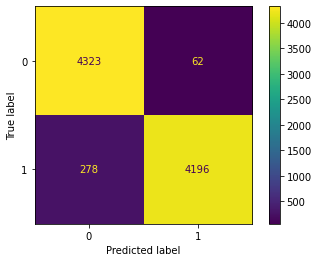

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(prediction['true'],prediction['pred'],labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=final_model.classes_)
disp.plot()
plt.show()